# 2a)

# Importing data

In [1]:
import time

import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Loading data

In [ ]:
data = loadmat('Assignment_4/Code&Data/PIE.mat')

In [2]:
Data = data['Data']
Labels = data['Label']

In [3]:
Train_Acc = []
Test_Acc = []
Running_Time = []

for i in range(5, 16, 5):
    n_sub = 21
    Train_Data = []
    Test_Data = []
    Train_Labels = []
    Test_Labels = []

    for j in range(1, 68):
        Train_Data.append(Data[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Data.append(Data[(j - 1) * n_sub + i:j * n_sub])
        Train_Labels.append(Labels[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Labels.append(Labels[(j - 1) * n_sub + i:j * n_sub])

    Train_Data = np.array(Train_Data).reshape(len(Train_Data * i), 900)
    Test_Data = np.array(Test_Data).reshape(len(Test_Data * (n_sub - i)), 900)
    Train_Labels = np.array(Train_Labels).reshape(len(Train_Labels) * Train_Labels[0].shape[0], 1)
    Test_Labels = np.array(Test_Labels).reshape(len(Test_Labels) * Test_Labels[0].shape[0], 1)

    start = time.time()

    # Standarization
    scaler = StandardScaler()
    Data_Train = scaler.fit_transform(Train_Data)
    Data_Test = scaler.transform(Test_Data)

    # Calculating Covariance matrix, Eigenvectors and Eigen values
    covariance_matrix = np.cov(Data_Train.T)
    values, vectors = np.linalg.eigh(covariance_matrix)

    # sorting based on eigen values
    Eigen_pairs = [(np.abs(values[k]), vectors[:, k]) for k in range(len(values))]
    Eigen_pairs = sorted(Eigen_pairs, key=lambda k: k[0], reverse=True)

    # Transforming from 900 to 100
    PCA_Transformed_Train = Data_Train.dot(np.transpose(np.array([a[1] for a in Eigen_pairs[0:100]])))
    PCA_Transformed_Test = Data_Test.dot(np.transpose(np.array([a[1] for a in Eigen_pairs[0:100]])))

    #KNN classifier
    KNN = KNeighborsClassifier(n_neighbors=5)
    KNN.fit(PCA_Transformed_Train, Train_Labels)

    Train_Acc.append(accuracy_score(Train_Labels, KNN.predict(PCA_Transformed_Train)))
    Test_Acc.append(accuracy_score(Test_Labels, KNN.predict(PCA_Transformed_Test)))
    end = time.time()

    # Running Time
    Running_Time.append(end - start)

#TABLE
TABLE_PCA = pd.DataFrame(list(zip(Train_Acc, Test_Acc, Running_Time)),
                         columns=["Training Accuracy using PCA", "Testing Accuracy using PCA", "Running Time"])


/Volumes/work/personal_umassd_assignments/data_mining/HW/hw4/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Volumes/work/personal_umassd_assignments/data_mining/HW/hw4/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Volumes/work/personal_umassd_assignments/data_mining/HW/hw4/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [4]:
i = 5
sw = np.zeros((900, 900))
Train_Acc_LDA = []
Test_Acc_LDA = []
Running_Time1 = []
meanv = []

for i in range(5, 16, 5):
    n_sub = 21
    Train_Data = []
    Test_Data = []
    Train_Labels = []
    Test_Labels = []

    for j in range(1, 68):
        Train_Data.append(Data[(j - 1) * n_sub:(j - 1) * n_sub + i])
        meanv.append(np.mean(Train_Data[-1], axis=0))

        # Calculating matrix
        sw += (np.matrix(Train_Data[-1] - meanv[-1]).T).dot(Train_Data[-1] - meanv[-1])
        Test_Data.append(Data[(j - 1) * n_sub + i:j * n_sub])
        Train_Labels.append(Labels[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Labels.append(Labels[(j - 1) * n_sub + i:j * n_sub])

    Train_Data = np.array(Train_Data).reshape(len(Train_Data * i), 900)
    Test_Data = np.array(Test_Data).reshape(len(Test_Data * (n_sub - i)), 900)
    Train_Labels = np.array(Train_Labels).reshape(len(Train_Labels) * Train_Labels[0].shape[0], 1)
    Test_Labels = np.array(Test_Labels).reshape(len(Test_Labels) * Test_Labels[0].shape[0], 1)

    start = time.time()

    #Computing the scatter matrix between classes, sb
    sb = np.zeros((900, 900))
    mean_t = np.mean(Train_Data, axis=0)
    for k in meanv:
        sb += (i) * ((np.matrix(k - mean_t).T).dot(np.matrix(k - mean_t)))

        #Calculating Eigenvectors and Eigen values
    values, vectors = np.linalg.eigh(np.linalg.inv(sw).dot(sb))

    # sorting based on eigen values
    Eigen_pairs = [(np.abs(values[k]), vectors[:, k]) for k in range(len(values))]
    Eigen_pairs = sorted(Eigen_pairs, key=lambda k: k[0], reverse=True)

    # Transforming from 900 to 100
    LDA_Transformed_Train = Train_Data.dot(np.transpose(np.array([a[1] for a in Eigen_pairs[0:100]])))
    lda_Transformed_test = Test_Data.dot(np.transpose(np.array([a[1] for a in Eigen_pairs[0:100]])))

    #KNN classifier
    KNN1 = KNeighborsClassifier(n_neighbors=5)
    KNN1.fit(LDA_Transformed_Train, Train_Labels)
    # recording train and test accuracies
    Train_Acc_LDA.append(accuracy_score(Train_Labels, KNN1.predict(LDA_Transformed_Train)))
    Test_Acc_LDA.append(accuracy_score(Test_Labels, KNN1.predict(lda_Transformed_test)))
    end = time.time()

    # recoding running time
    Running_Time1.append(end - start)

TABLE_LDA = pd.DataFrame(list(zip(Train_Acc_LDA, Test_Acc_LDA, Running_Time1)),
                         columns=["Training Accuracy using LDA", "Testing Accuracy using LDA", "Running Time"])


/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [5]:
FINAL_TABLE = pd.concat([TABLE_PCA, TABLE_LDA], axis=1)
new_col = [5, 10, 15]

# Inserting the column at the
# beginning in the DataFrame
FINAL_TABLE.insert(loc=0,
                   column='Training Time',
                   value=new_col)

In [6]:
FINAL_TABLE

,Training Time,Training Accuracy using PCA,Testing Accuracy using PCA,Running Time,Training Accuracy using LDA,Testing Accuracy using LDA,Running Time
0,5,0.877612,0.434701,0.172461,0.859701,0.396455,0.340593
1,10,0.943284,0.500678,0.300681,0.929851,0.473541,0.575368
2,15,0.981095,0.975124,0.299624,0.981095,0.972637,0.603167


# 2b)

In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Train_Acc = []
Test_Acc = []
Running_Time_PCA = []

for i in range(5, 16, 5):

    n_sub = 21

    Train_Data = []
    Test_Data = []
    Train_Labels = []
    Test_Labels = []

    for j in range(1, 68):
        Train_Data.append(Data[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Data.append(Data[(j - 1) * n_sub + i:j * n_sub])
        Train_Labels.append(Labels[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Labels.append(Labels[(j - 1) * n_sub + i:j * n_sub])

    Train_Data = np.array(Train_Data).reshape(len(Train_Data * i), 900)
    Test_Data = np.array(Test_Data).reshape(len(Test_Data * (n_sub - i)), 900)
    Train_Labels = np.array(Train_Labels).reshape(len(Train_Labels) * Train_Labels[0].shape[0], 1)
    Test_Labels = np.array(Test_Labels).reshape(len(Test_Labels) * Test_Labels[0].shape[0], 1)

    start = time.time()
    PCA1 = PCA(n_components=100)
    PCA_Transformed_Train = PCA1.fit_transform(Train_Data)
    PCA_Transformed_Test = PCA1.transform(Test_Data)

    KNN_PCA = KNeighborsClassifier(n_neighbors=5)
    KNN_PCA.fit(PCA_Transformed_Train, Train_Labels)

    # recording train and test accuracies
    Train_Acc.append(accuracy_score(Train_Labels, KNN_PCA.predict(PCA_Transformed_Train)))
    Test_Acc.append(accuracy_score(Test_Labels, KNN_PCA.predict(PCA_Transformed_Test)))
    end = time.time()

    # recoding running time
    Running_Time_PCA.append(end - start)

TABLES_PCA_1 = pd.DataFrame(list(zip(Train_Acc, Test_Acc, Running_Time_PCA)),
                            columns=["Training Accuracy using PCA", "Testing Accuracy using PCA", "Running Time"])


/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
Train_Acc_LDA = []
Test_Acc_LDA = []
Running_Time_LDA = []

for i in range(5, 16, 5):

    n_sub = 21

    Train_Data = []
    Test_Data = []
    Train_Labels = []
    Test_Labels = []

    for j in range(1, 68):
        Train_Data.append(Data[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Data.append(Data[(j - 1) * n_sub + i:j * n_sub])
        Train_Labels.append(Labels[(j - 1) * n_sub:(j - 1) * n_sub + i])
        Test_Labels.append(Labels[(j - 1) * n_sub + i:j * n_sub])

    Train_Data = np.array(Train_Data).reshape(len(Train_Data * i), 900)
    Test_Data = np.array(Test_Data).reshape(len(Test_Data * (n_sub - i)), 900)
    Train_Labels = np.array(Train_Labels).reshape(len(Train_Labels) * Train_Labels[0].shape[0], 1)
    Test_Labels = np.array(Test_Labels).reshape(len(Test_Labels) * Test_Labels[0].shape[0], 1)

    start = time.time()

    LDA = LinearDiscriminantAnalysis(n_components=66)
    LDA_Transformed_Train = LDA.fit_transform(Train_Data, Train_Labels)
    LDA_Transformed_Test = LDA.transform(Test_Data)

    KNN_LDA = KNeighborsClassifier(n_neighbors=5)
    KNN_LDA.fit(LDA_Transformed_Train, Train_Labels)

    Train_Acc_LDA.append(accuracy_score(Train_Labels, KNN_LDA.predict(LDA_Transformed_Train)))
    Test_Acc_LDA.append(accuracy_score(Test_Labels, KNN_LDA.predict(LDA_Transformed_Test)))
    end = time.time()

    # recoding running time
    Running_Time_LDA.append(end - start)

TABLES_LDA_1 = pd.DataFrame(list(zip(Train_Acc_LDA, Test_Acc_LDA, Running_Time_LDA)),
                            columns=["Training Accuracy using LDA", "Testing Accuracy using LDA", "Running Time"])

/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/varun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array wa

In [9]:
TABLES = pd.concat([TABLES_PCA_1, TABLES_LDA_1], axis=1)
new_col = [5, 10, 15]

# Inserting the column at the
# beginning in the DataFrame
TABLES.insert(loc=0,
              column='Training Time',
              value=new_col)

In [10]:
TABLES

,Training Time,Training Accuracy using PCA,Testing Accuracy using PCA,Running Time,Training Accuracy using LDA,Testing Accuracy using LDA,Running Time
0,5,0.910448,0.448694,0.106400,1.0,0.527985,0.224739
1,10,0.947761,0.515604,0.123593,1.0,0.754410,0.356384
2,15,0.986070,0.980100,0.144407,1.0,0.985075,0.430748


# 2c)

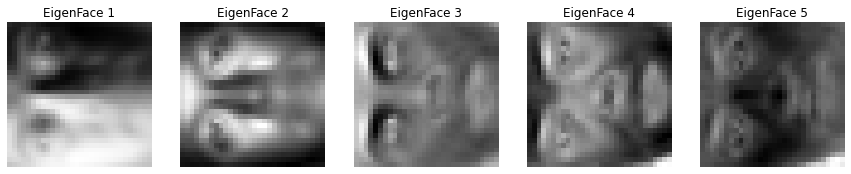

In [12]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset and flatten images
data = loadmat('/Users/varun/Downloads/Assignment_4/Code&Data/PIE.mat')
#Access data from .mat file
variable1 = data['Data']
variable2 = data['Label']
n_samples, n_features = variable1.shape
X_flat = variable1.reshape((n_samples, -1))

# Perform PCA with n_components=5
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_flat)

# Get the first five leading eigenvectors
eigenfaces = pca.components_.reshape((100, 30, 30))

# Plot the EigenFaces
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(eigenfaces[i], cmap='gray')
    axs[i].set_title(f'EigenFace {i + 1}')
    axs[i].axis('off')

plt.show()

